KNeighborsClassifier,Random Forest Classifier,Logistic Regression and Support Vector Classifier were best models of our midterm project.We splitted models.We took feature engineering part from our midterm project.We split data for training.After that groups member interested in own models.When we tried to combine our models in a single ipynb file,there began to be fluctuations in values.Therefore we reduced the number of kmeans clusters to 30 to check the accuracies with different parameters.

In [3]:
import numpy as np 
import pandas as pd
import warnings
warnings.simplefilter("ignore")
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
plt.style.use('ggplot')
%matplotlib inline



In [4]:
data=pd.read_csv('mushrooms.csv')
data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [6]:
#seperating  
X=data.drop('class',axis=1) #Predictors
y=data['class'] #Response
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,x,s,n,t,p,f,c,n,k,e,...,s,w,w,p,w,o,p,k,s,u
1,x,s,y,t,a,f,c,b,k,e,...,s,w,w,p,w,o,p,n,n,g
2,b,s,w,t,l,f,c,b,n,e,...,s,w,w,p,w,o,p,n,n,m
3,x,y,w,t,p,f,c,n,n,e,...,s,w,w,p,w,o,p,k,s,u
4,x,s,g,f,n,f,w,b,k,t,...,s,w,w,p,w,o,e,n,a,g


In [7]:
len(np.unique(X['cap-color']))

10

In [8]:
from sklearn.preprocessing import LabelEncoder
Encoder_X = LabelEncoder() 
for col in X.columns:
    X[col] = Encoder_X.fit_transform(X[col])
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)

In [9]:
X.head()

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,...,2,7,7,0,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,...,2,7,7,0,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,...,2,7,7,0,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,...,2,7,7,0,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,...,2,7,7,0,2,1,0,3,0,1


In [10]:
y

array([1, 0, 0, ..., 0, 1, 0])

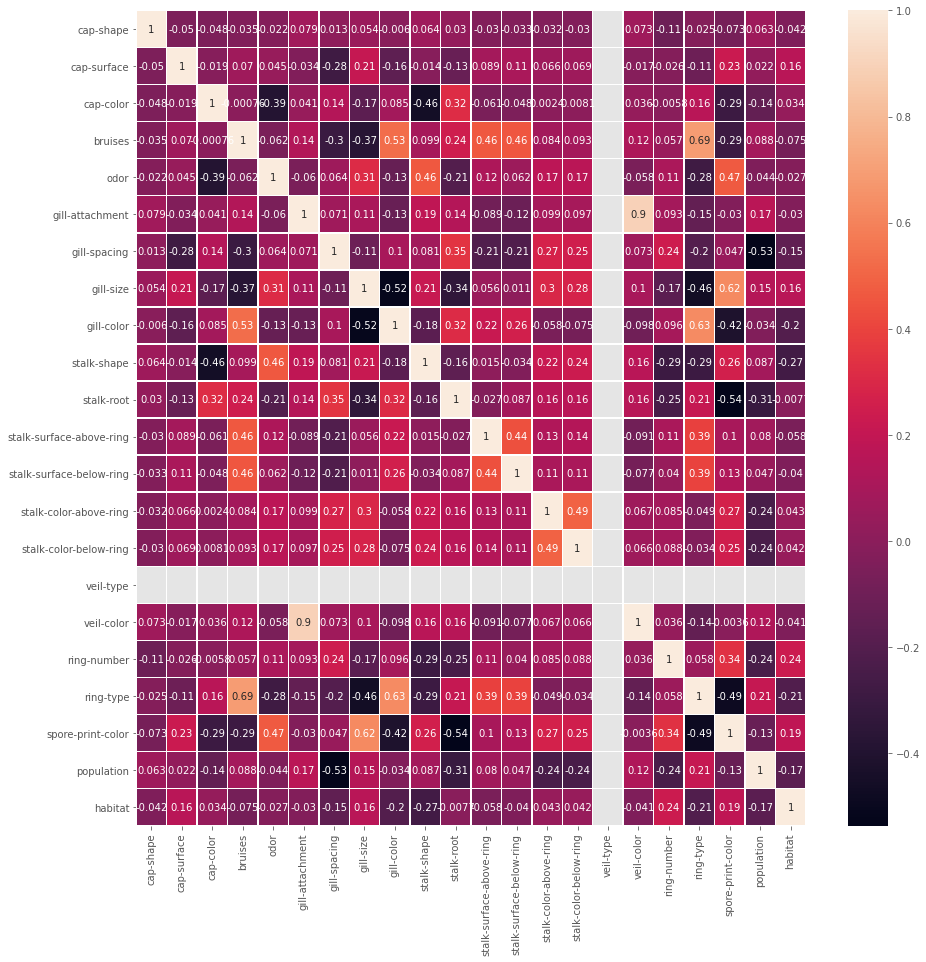

In [11]:
# Using Advanced Plotting Tool to plot correlation 
plt.figure(figsize=(15,15))
sns.heatmap(X.corr(), annot=True, linewidths=.5)
plt.show()

In [12]:
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head()

,cap-shape_1,cap-shape_2,cap-shape_3,cap-shape_4,cap-shape_5,cap-surface_1,cap-surface_2,cap-surface_3,cap-color_1,cap-color_2,...,population_2,population_3,population_4,population_5,habitat_1,habitat_2,habitat_3,habitat_4,habitat_5,habitat_6
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,...,1,0,0,0,0,0,1,0,0,0
3,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0


We split data into a training set and a test set:

In [200]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [201]:
from sklearn.preprocessing import StandardScaler#normalize
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [202]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)

X_train = pca.fit_transform(X_train)
X_test = pca.transform(X_test)


# I fit a Random Forest Classifier model and evaluate it on the test set:

Berfim Korkmaz applied Random Forest Classifier and K-Neighbor Nearest Classification models.

In [244]:
from sklearn.ensemble import RandomForestClassifier
rand_forest = RandomForestClassifier(random_state=42)
rand_forest.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [245]:
rand_forest.score(X_test,y_test)

0.9294503691550451

92.94% accuracy. If i can do better by using K-Means as a preprocessing step. We will create a pipeline that will first cluster the training set into 50 clusters.

In [246]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=50)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

In [247]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([   
    ("kmeans", KMeans(n_clusters=30)),    
    ("rand_forest", RandomForestClassifier()), ])
pipeline.fit(X_train, y_train) 

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=30, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0)),
                ('rand_forest',
                 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                        class_weight=None, criterion='gini',
                                        max_depth=None, max_features='auto',
                                        max_leaf_nodes=None, max_samples=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        n_estimators=100, n_j

In [248]:
pipeline.score(X_test,y_test)

0.9323215750615258

The best value of k is simply the one that results in the best classification performance.

In [250]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters=range(2, 30))
grid_clf = GridSearchCV(pipeline, param_grid, cv=5, verbose=6)
grid_clf.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ kmeans__n_clusters=2, score=0.919, total=   1.3s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.2s remaining:    0.0s


[CV] ................ kmeans__n_clusters=2, score=0.900, total=   1.4s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.7s remaining:    0.0s


[CV] ................ kmeans__n_clusters=2, score=0.894, total=   2.0s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    4.6s remaining:    0.0s


[CV] ................ kmeans__n_clusters=2, score=0.895, total=   1.6s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    6.2s remaining:    0.0s


[CV] ................ kmeans__n_clusters=2, score=0.911, total=   1.6s
[CV] kmeans__n_clusters=3 ............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    7.8s remaining:    0.0s


[CV] ................ kmeans__n_clusters=3, score=0.938, total=   1.4s
[CV] kmeans__n_clusters=3 ............................................
[CV] ................ kmeans__n_clusters=3, score=0.922, total=   1.3s
[CV] kmeans__n_clusters=3 ............................................
[CV] ................ kmeans__n_clusters=3, score=0.923, total=   1.3s
[CV] kmeans__n_clusters=3 ............................................
[CV] ................ kmeans__n_clusters=3, score=0.923, total=   1.3s
[CV] kmeans__n_clusters=3 ............................................
[CV] ................ kmeans__n_clusters=3, score=0.930, total=   1.6s
[CV] kmeans__n_clusters=4 ............................................
[CV] ................ kmeans__n_clusters=4, score=0.938, total=   2.0s
[CV] kmeans__n_clusters=4 ............................................
[CV] ................ kmeans__n_clusters=4, score=0.922, total=   1.9s
[CV] kmeans__n_clusters=4 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:  8.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=30, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=None, tol=0.0001,
                                               verbose=0)),
                                       ('rand_forest',
                                        RandomForestClassifier(bootstrap=True,
                                                               ccp_alpha=0.0,
                                                               class_weight=None,
                                                               criterio

In [251]:
 grid_clf.best_params_ 

{'kmeans__n_clusters': 5}

The best number of clusters is:

In [252]:
 grid_clf.score(X_test, y_test) 

0.9294503691550451

In [253]:
pipeline_accuracy=pipeline.score(X_test,y_test)
classification_accuracy=rand_forest.score(X_test,y_test)
gridsearchcv_accuracy = grid_clf.score(X_test, y_test) 

df_accuracy = pd.DataFrame({'Y test':0 , 'Classification':classification_accuracy ,'Pipeline':pipeline_accuracy , 'GridSearch':gridsearchcv_accuracy}, columns =['Y test','Classification','Pipeline','GridSearch'], index =['Accuracy'])
df_accuracy

,Y test,Classification,Pipeline,GridSearch
Accuracy,0,0.92945,0.932322,0.92945


# I fit a K-Neighbors Classifier model and evaluate it on the test set:

In [32]:
from sklearn.neighbors import KNeighborsClassifier as KNN
knn = KNN(n_neighbors=20)
knn.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=20, p=2,
                     weights='uniform')

In [33]:
knn.score(X_test,y_test)

0.9310910582444627

93.10% accuracy. If i can do better by using K-Means as a preprocessing step. We will create a pipeline that will first cluster the training set into 40 clusters.

In [34]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([    
    ("kmeans", KMeans(n_clusters=40)), 
    ("knn", KNN()), ])
pipeline.fit(X_train, y_train) 

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=40, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0)),
                ('knn',
                 KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                      metric='minkowski', metric_params=None,
                                      n_jobs=None, n_neighbors=5, p=2,
                                      weights='uniform'))],
         verbose=False)

In [35]:
pipeline.score(X_test,y_test)

0.9315012305168171

The best value of k is simply the one that results in the best classification performance.

In [36]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters=range(2, 30))
grid_clf = GridSearchCV(pipeline, param_grid, cv=10, verbose=2)
grid_clf.fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.1s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.1s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ............................. kmeans__n_clusters=2, total=   0.1s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.1s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.1s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.1s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.1s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.1s
[CV] kmeans__n_clusters=2 ............................................
[CV] ............................. kmeans__n_clusters=2, total=   0.1s
[CV] kmeans__n_clusters=2 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 280 out of 280 | elapsed:  2.2min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=40, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=None, tol=0.0001,
                                               verbose=0)),
                                       ('knn',
                                        KNeighborsClassifier(algorithm='auto',
                                                             leaf_size=30,
                                                             metric='minkowski',
                                                             metric_params=None,
 

I increased the number of folds to use more training data in each iteration; this will lower the bias towards estimating the generalization error. On the other hand, it will also increase the run-time and variance of your estimate.

In [180]:
 grid_clf.best_params_

{'kmeans__n_clusters': 41}

The best number of clusters is:

In [38]:
 grid_clf.score(X_test, y_test)

0.9323215750615258

In [39]:
pipeline_accuracy=pipeline.score(X_test,y_test)
classification_accuracy=knn.score(X_test,y_test)
gridsearchcv_accuracy = grid_clf.score(X_test, y_test) 

df_accuracy = pd.DataFrame({'Y test':0 , 'Classification':classification_accuracy ,'Pipeline':pipeline_accuracy , 'GridSearch':gridsearchcv_accuracy}, columns =['Y test','Classification','Pipeline','GridSearch'], index =['Accuracy'])
df_accuracy

,Y test,Classification,Pipeline,GridSearch
Accuracy,0,0.931091,0.931501,0.932322


In [42]:
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

# I fit a Logistic Regression model and evaluate it on the test set:

Büşra Aslankaya applied Logistic Regression and SVC Classification models.

In [56]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=42, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [57]:
lr.score(X_test, y_test)

0.9027891714520099

90.27% accuracy. If i can do better by using K-Means as a preprocessing step. We will create a pipeline that will first cluster the training set into 40 clusters.

In [58]:
print("Results:\n")
print('Test Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,lr.predict(X_test))))
print('Test Classification Report:\n{}\n'.format(classification_report(y_test,lr.predict(X_test))))

Results:

Test Accuracy Score: 0.9028

Test Classification Report:
              precision    recall  f1-score   support

           0       0.86      0.97      0.91      1257
           1       0.96      0.83      0.89      1181

    accuracy                           0.90      2438
   macro avg       0.91      0.90      0.90      2438
weighted avg       0.91      0.90      0.90      2438




In [65]:
from sklearn.cluster import KMeans

kmeans = KMeans(
    n_clusters=3, init='random',
    n_init=10, max_iter=300 
)
y_kmeans = kmeans.fit_predict(X)

In [66]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([    
    ("kmeans", KMeans(n_clusters=40)), 
    ("lr", LogisticRegression()), ])


In [67]:
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=40, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=None,
                        tol=0.0001, verbose=0)),
                ('lr',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='auto', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='lbfgs', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [68]:
pipeline.score(X_test, y_test)

0.9179655455291222

The best value of k is simply the one that results in the best classification performance.

In [179]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters=range(2, 50)) 
grid_clf = GridSearchCV(pipeline, param_grid, cv=10, verbose=4) 
grid_clf.fit(X_train, y_train)

Fitting 10 folds for each of 48 candidates, totalling 480 fits
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ kmeans__n_clusters=2, score=0.916, total=   0.4s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ................ kmeans__n_clusters=2, score=0.931, total=   0.4s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] ................ kmeans__n_clusters=2, score=0.910, total=   0.4s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s


[CV] ................ kmeans__n_clusters=2, score=0.900, total=   0.4s
[CV] kmeans__n_clusters=2 ............................................
[CV] ................ kmeans__n_clusters=2, score=0.916, total=   0.4s
[CV] kmeans__n_clusters=2 ............................................
[CV] ................ kmeans__n_clusters=2, score=0.916, total=   0.4s
[CV] kmeans__n_clusters=2 ............................................
[CV] ................ kmeans__n_clusters=2, score=0.914, total=   0.4s
[CV] kmeans__n_clusters=2 ............................................
[CV] ................ kmeans__n_clusters=2, score=0.903, total=   0.5s
[CV] kmeans__n_clusters=2 ............................................
[CV] ................ kmeans__n_clusters=2, score=0.923, total=   0.4s
[CV] kmeans__n_clusters=2 ............................................
[CV] ................ kmeans__n_clusters=2, score=0.910, total=   0.5s
[CV] kmeans__n_clusters=3 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 480 out of 480 | elapsed:  8.6min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=60, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=42, tol=0.0001,
                                               verbose=0)),
                                       ('svc',
                                        SVC(C=30, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                          

I increased the number of folds to use more training data in each iteration; this will lower the bias towards estimating the generalization error. On the other hand, it will also increase the run-time and variance of your estimate.

In [183]:
grid_clf.best_params_

{'kmeans__n_clusters': 41}

The best number of clusters is:

In [184]:
grid_clf.score(X_test, y_test) 

0.9138638228055783

In [75]:
pipeline_accuracy=pipeline.score(X_test,y_test)
classification_accuracy=lr.score(X_test,y_test)
gridsearch_accuracy = grid_clf.score(X_test, y_test) 

df_accuracy = pd.DataFrame({'Y test':0 , 'Classification':classification_accuracy ,'Pipeline':pipeline_accuracy , 'GridSearch':gridsearch_accuracy}, columns =['Y test','Classification','Pipeline','GridSearch'], index =['Accuracy'])
df_accuracy

,Y test,Classification,Pipeline,GridSearch
Accuracy,0,0.902789,0.917966,0.917966


# I fit a SVC model and evaluate it on the test set:

In [141]:
from sklearn.svm import SVC

svc = SVC(C = 15,random_state=0)
svc.fit(X_train, y_train)

SVC(C=15, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=0, shrinking=True, tol=0.001,
    verbose=False)

In [142]:
svc.score(X_test, y_test)

0.9122231337161608

91.22% accuracy. If i can do better by using K-Means as a preprocessing step. We will create a pipeline that will first cluster the training set into 60 clusters.

In [143]:
print("Results:\n")
print('Test Accuracy Score: {0:.4f}\n'.format(accuracy_score(y_test,svc.predict(X_test))))
print('Test Classification Report:\n{}\n'.format(classification_report(y_test,svc.predict(X_test))))

Results:

Test Accuracy Score: 0.9122

Test Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.98      0.92      1257
           1       0.97      0.84      0.90      1181

    accuracy                           0.91      2438
   macro avg       0.92      0.91      0.91      2438
weighted avg       0.92      0.91      0.91      2438




In [144]:
from sklearn.pipeline import Pipeline
pipeline = Pipeline([    
                     ("kmeans", KMeans(n_clusters=60, random_state=42)),    
                     ("svc", SVC(C = 30,random_state=0)), 
                     ]) 
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('kmeans',
                 KMeans(algorithm='auto', copy_x=True, init='k-means++',
                        max_iter=300, n_clusters=60, n_init=10, n_jobs=None,
                        precompute_distances='auto', random_state=42,
                        tol=0.0001, verbose=0)),
                ('svc',
                 SVC(C=30, break_ties=False, cache_size=200, class_weight=None,
                     coef0=0.0, decision_function_shape='ovr', degree=3,
                     gamma='scale', kernel='rbf', max_iter=-1,
                     probability=False, random_state=0, shrinking=True,
                     tol=0.001, verbose=False))],
         verbose=False)

In [145]:
pipeline.score(X_test, y_test)

0.9134536505332239

The best value of k is simply the one that results in the best classification performance.

In [166]:
from sklearn.model_selection import GridSearchCV
param_grid = dict(kmeans__n_clusters=range(2, 50)) 
grid_clf = GridSearchCV(pipeline, param_grid, cv=5, verbose=6) 
grid_clf.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ................ kmeans__n_clusters=2, score=0.922, total=   0.4s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV] ................ kmeans__n_clusters=2, score=0.904, total=   0.4s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.7s remaining:    0.0s


[CV] ................ kmeans__n_clusters=2, score=0.916, total=   0.4s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    1.1s remaining:    0.0s


[CV] ................ kmeans__n_clusters=2, score=0.909, total=   0.5s
[CV] kmeans__n_clusters=2 ............................................


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    1.6s remaining:    0.0s


[CV] ................ kmeans__n_clusters=2, score=0.914, total=   0.5s
[CV] kmeans__n_clusters=3 ............................................


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    2.1s remaining:    0.0s


[CV] ................ kmeans__n_clusters=3, score=0.922, total=   0.3s
[CV] kmeans__n_clusters=3 ............................................
[CV] ................ kmeans__n_clusters=3, score=0.903, total=   0.3s
[CV] kmeans__n_clusters=3 ............................................
[CV] ................ kmeans__n_clusters=3, score=0.914, total=   0.3s
[CV] kmeans__n_clusters=3 ............................................
[CV] ................ kmeans__n_clusters=3, score=0.909, total=   0.3s
[CV] kmeans__n_clusters=3 ............................................
[CV] ................ kmeans__n_clusters=3, score=0.912, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] ................ kmeans__n_clusters=4, score=0.924, total=   0.4s
[CV] kmeans__n_clusters=4 ............................................
[CV] ................ kmeans__n_clusters=4, score=0.903, total=   0.3s
[CV] kmeans__n_clusters=4 ............................................
[CV] .

[Parallel(n_jobs=1)]: Done 240 out of 240 | elapsed:  3.9min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('kmeans',
                                        KMeans(algorithm='auto', copy_x=True,
                                               init='k-means++', max_iter=300,
                                               n_clusters=60, n_init=10,
                                               n_jobs=None,
                                               precompute_distances='auto',
                                               random_state=42, tol=0.0001,
                                               verbose=0)),
                                       ('svc',
                                        SVC(C=30, break_ties=False,
                                            cache_size=200, class_weight=None,
                                            coef0=0.0,
                                            decision_function_shape='ovr',
                                           

In [167]:
grid_clf.best_params_

{'kmeans__n_clusters': 48}

The best number of clusters is:

In [168]:
grid_clf.score(X_test, y_test)

0.9142739950779327

In [169]:
pipeline_accuracy=pipeline.score(X_test,y_test)
classification_accuracy=svc.score(X_test,y_test)
gridsearch_accuracy = grid_clf.score(X_test, y_test) 

df_accuracy = pd.DataFrame({'Y test':0 , 'Classification':classification_accuracy ,'Pipeline':pipeline_accuracy , 'GridSearch':gridsearch_accuracy}, columns =['Y test','Classification','Pipeline','GridSearch'], index =['Accuracy'])
df_accuracy

,Y test,Classification,Pipeline,GridSearch
Accuracy,0,0.912223,0.913454,0.914274
